In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
company = pd.read_csv("/content/Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


No missing Values and duplicated rows in data

CompPrice


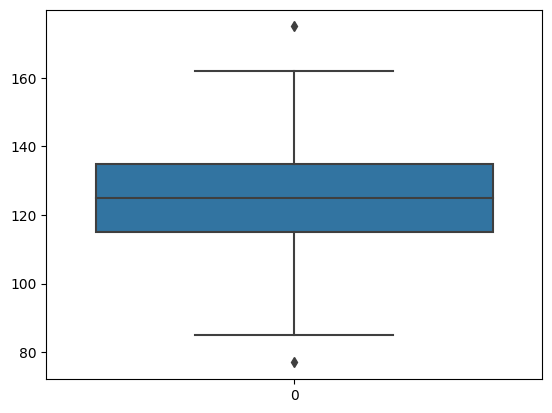

Income


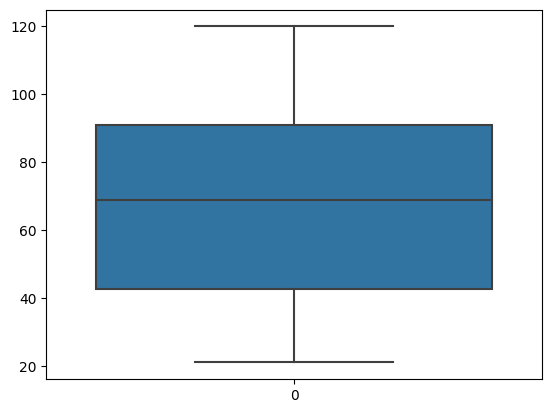

Advertising


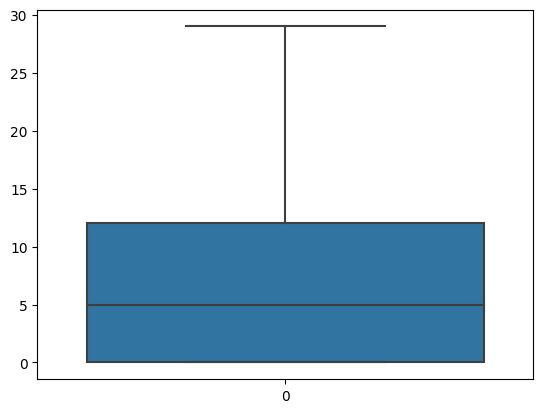

Population


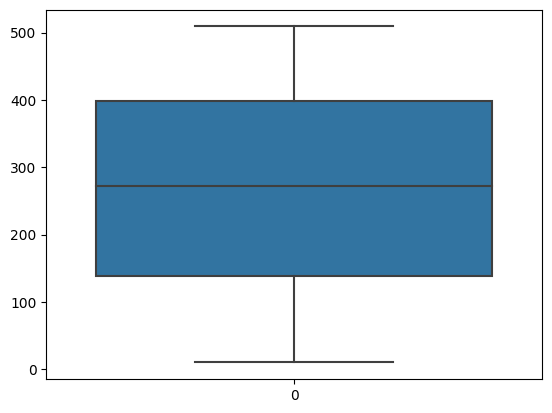

Price


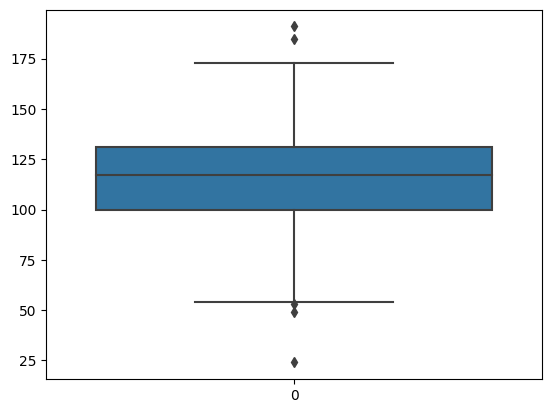

Age


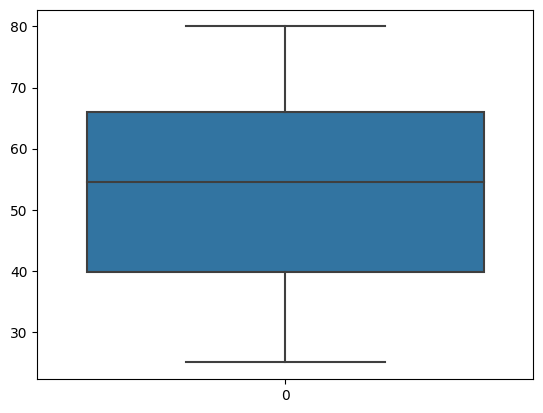

Education


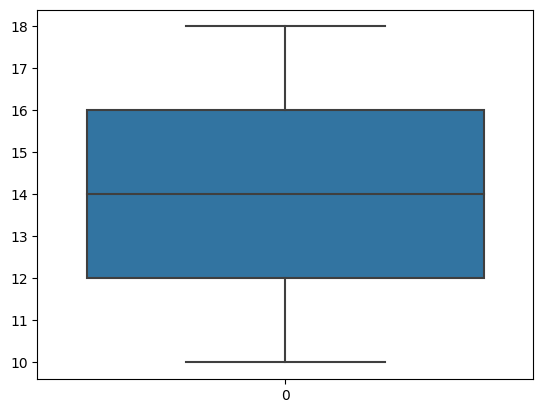

In [6]:
#finding outliers
for feature in company.columns:
  if company[feature].dtype == 'int64':
    print(feature)
    sns.boxplot(company[feature])
    plt.show()

Found outliers in comprice and price features

In [7]:
#handling outliers in company data
company['CompPrice'].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

In [8]:
q1=company['CompPrice'].quantile(0.25)
q3=company['CompPrice'].quantile(0.75)
IQR = q3-q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Identify the outlier values in x['CompPrice']
outliers = company[(company['CompPrice'] < lower_bound) | (company['CompPrice'] > upper_bound)]

# Print the outliers
print(outliers)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
42   10.43         77      69            0          25     24    Medium   50   
310   9.53        175      65           29         419    166    Medium   53   

     Education Urban   US  
42          18   Yes   No  
310         12   Yes  Yes  


In [9]:
company['Price'].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

In [10]:
q1=company['Price'].quantile(0.25)
q3=company['Price'].quantile(0.75)
IQR = q3-q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Identify the outlier values in x['CompPrice']
outliers = company[(company['Price'] < lower_bound) | (company['Price'] > upper_bound)]

# Print the outliers
print(outliers)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
42   10.43         77      69            0          25     24    Medium   50   
125   9.34         89      78            0         181     49    Medium   43   
165   0.37        147      58            7         100    191       Bad   27   
174   0.00        139      24            0         358    185    Medium   79   
367  14.37         95     106            0         256     53      Good   52   

     Education Urban   US  
42          18   Yes   No  
125         15    No   No  
165         15   Yes  Yes  
174         15    No   No  
367         17   Yes   No  


In [11]:
indices_to_drop = [42,125,165,174,310,367]
company = company.drop(indices_to_drop)
company = company.reset_index(drop=True)

AS per problem statement target variable is Sales which is need to convert into categorical

In [12]:
company['Sales'].describe()

count    394.000000
mean       7.498706
std        2.768371
min        0.160000
25%        5.405000
50%        7.470000
75%        9.292500
max       16.270000
Name: Sales, dtype: float64

In [13]:
bins = [0,7.5,17]
labels = ['low','high']
company['sales_cat'] = pd.cut(x = company['Sales'], bins = bins, labels=labels, right = False)
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low


In [14]:
company = company.drop("Sales",axis=1)

In [15]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    394 non-null    int64   
 1   Income       394 non-null    int64   
 2   Advertising  394 non-null    int64   
 3   Population   394 non-null    int64   
 4   Price        394 non-null    int64   
 5   ShelveLoc    394 non-null    object  
 6   Age          394 non-null    int64   
 7   Education    394 non-null    int64   
 8   Urban        394 non-null    object  
 9   US           394 non-null    object  
 10  sales_cat    394 non-null    category
dtypes: category(1), int64(7), object(3)
memory usage: 31.4+ KB


In [16]:
#converting categorical variable into numerical using label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for feature in company.columns:
  if company[feature].dtype == 'object' or company[feature].dtype == 'category':
    company[feature] = label.fit_transform(company[feature])

In [17]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [18]:
company['sales_cat'].value_counts()

1    199
0    195
Name: sales_cat, dtype: int64

balanced data set

In [19]:
# dividing independent and dependent variables
X = company.iloc[:,:10]
y = company.iloc[:,-1]

In [20]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [21]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: sales_cat, dtype: int64

In [22]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rf_model = RandomForestClassifier(n_estimators=1000, max_features=4,max_depth=3)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=4, n_estimators=1000)

In [23]:
print("train Score", rf_model.score(X_train,y_train))
print("test Score", rf_model.score(X_test,y_test))

train Score 0.8821292775665399
test Score 0.7633587786259542


In [24]:
print(classification_report(y_train,rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       123
           1       0.85      0.94      0.89       140

    accuracy                           0.88       263
   macro avg       0.89      0.88      0.88       263
weighted avg       0.89      0.88      0.88       263



In [25]:
print(classification_report(y_test,rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        72
           1       0.69      0.85      0.76        59

    accuracy                           0.76       131
   macro avg       0.77      0.77      0.76       131
weighted avg       0.78      0.76      0.76       131



Precision,recall and F1 score are good with respect to accuracy of test data but model is overfitted.

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_trees = 1000
max_features = 4
max_depth = 3
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, max_depth=max_depth)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print(results.mean())

[0.66666667 0.7037037  0.81481481 0.65384615 0.88461538 0.65384615
 0.69230769 0.73076923 0.80769231 0.76923077]
0.7377492877492877


varaince is also high for this model.

In [27]:
k_fold = KFold(n_splits=5)
param_grid = {
    'n_estimators': [10, 50, 100],  # Values for num_trees
    'max_features': ['sqrt', 'log2'],  # Values for max_features
    'max_depth': [None, 5, 10],  # Values for max_depth
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=k_fold)
grid_search.fit(X_train, y_train)  # X: your feature data, y: your target data
best_model = grid_search.best_estimator_
cross_val_scores = cross_val_score(best_model, X, y, cv=k_fold)
print("Best Hyperparameters: ", grid_search.best_params_)
print("Cross-Validation Scores: ", cross_val_scores)


Best Hyperparameters:  {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
Cross-Validation Scores:  [0.81012658 0.64556962 0.82278481 0.81012658 0.83333333]


In [28]:
k_fold = KFold(n_splits=5)
model_1 = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=10)
model_1.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [29]:
print("trainScore", model_1.score(X_train, y_train))
print("testScore", model_1.score(X_test,y_test))

trainScore 1.0
testScore 0.7633587786259542


In [30]:
print(classification_report(y_test, model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77        72
           1       0.71      0.81      0.76        59

    accuracy                           0.76       131
   macro avg       0.77      0.77      0.76       131
weighted avg       0.77      0.76      0.76       131



F1 scores are Good for this model only issue is overfitted model.

#various ensemble Techniques

In [39]:
#bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7

kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print(results.mean())

[0.7037037  0.77777778 0.81481481 0.69230769 0.73076923 0.65384615
 0.73076923 0.76923077 0.88461538 0.88461538]
0.7642450142450142


In [44]:
#Boosting
from sklearn.ensemble import AdaBoostClassifier

num_trees = 100
seed=7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_boost = cross_val_score(model2, X_train, y_train, cv=kfold)
print(results_boost)
print(results_boost.mean())

[0.77777778 0.81481481 0.88888889 0.84615385 0.73076923 0.73076923
 0.73076923 0.88461538 0.92307692 0.92307692]
0.8250712250712251


In [45]:
#stacking
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [46]:
# create the sub models
estimators = []
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))
model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))
model5 = SVC()
estimators.append(('svm', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results_stack = cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results_stack)
print(results_stack.mean())

[0.66666667 0.7037037  0.7037037  0.57692308 0.76923077 0.69230769
 0.76923077 0.73076923 0.84615385 0.76923077]
0.7227920227920228


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


comparing all models metrics adaBoostclassifier model is good.

In [47]:
num_trees = 100
seed=7
final_model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
final_model.fit(X_train,y_train)


AdaBoostClassifier(n_estimators=100, random_state=7)

In [49]:
print("train score",final_model.score(X_train,y_train))
print("test Score",final_model.score(X_test,y_test))

train score 0.9923954372623575
test Score 0.8244274809160306


In [50]:
print(classification_report(y_test, final_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        72
           1       0.80      0.81      0.81        59

    accuracy                           0.82       131
   macro avg       0.82      0.82      0.82       131
weighted avg       0.82      0.82      0.82       131



accuracy is good and precision, recall and f1 score also good.